<a href="https://colab.research.google.com/github/ssgalitsky/NMA/blob/main/ANM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown ## install dependencies
!pip install prody


In [3]:
from prody import *
from pylab import *
ion()


In [4]:
#@markdown ##SARS-CoV-2 spike glycoprotein (closed state)
#@markdown #####For the closed state structure (6vxx, 438:53kDa, Atom Count: 23694 atoms, 2916 residues) 
spike = parsePDB('6vxx')

@> PDB file is found in working directory (6vxx.pdb.gz).
@> 23694 atoms and 1 coordinate set(s) were parsed in 0.23s.


In [5]:
calphas = spike.select('protein and name CA')
#calphas = spike.select('protein')
calphas.numAtoms()


2916

In [10]:
#@markdown ##instantiate an ANM instance:
anm = ANM('6vxx ANM analysis')

#@markdown #####build the Hessian matrix by passing selected atoms (351 Cα’s) to ANM.buildHessian() method:
#anm.buildHessian(calphas,cutoff=15.0, gamma=1.0, sparse=True)
anm.buildHessian(calphas,cutoff=25.0, gamma=15)

anm.calcModes(50,False,True)
anm.getEigvals().round(3)

#@markdown ######For PCA and EDA models built using coordinate data in Å, unit of eigenvalues is Å2. For ANM, GNM, and RTB, on the other hand, eigenvalues are in arbitrary or relative units but they correlate with stiffness of the motion along associated eigenvector.

@> Hessian was built in 6.33s.
@> 50 modes were calculated in 102.41s.


array([ 13.268,  13.269,  18.961,  22.458,  22.458,  35.53 ,  46.591,
        46.593,  47.953,  51.045,  60.926,  60.927,  66.656,  75.078,
        75.082,  83.833,  89.173,  89.183,  91.499,  91.503,  97.46 ,
       105.095, 105.107, 109.369, 111.308, 112.566, 112.573, 120.601,
       122.693, 122.697, 125.792, 125.796, 134.905, 134.906, 141.56 ,
       149.236, 149.254, 152.578, 155.925, 157.68 , 157.92 , 157.929,
       161.205, 161.217, 163.875, 163.897, 171.67 , 171.677, 174.257,
       177.939])

In [11]:
import math
import numpy as np

#anm_cm=np.sqrt(1.3211e7*anm.getEigvals())
#@markdown ##angular frequency, cm-1
anm_cm=np.sqrt(anm.getEigvals())/(2*math.pi)
#anm_cm=np.sqrt(anm.getEigvals()/13.2)
anm_cm



array([0.57973683, 0.57974651, 0.6930195 , 0.75423122, 0.75423187,
       0.94868217, 1.08635378, 1.08637862, 1.10211878, 1.13710049,
       1.24228101, 1.24229245, 1.29938873, 1.37903471, 1.3790778 ,
       1.45722825, 1.50292704, 1.50301001, 1.52239952, 1.52243311,
       1.57120378, 1.63158908, 1.63168245, 1.66443392, 1.67912813,
       1.68858977, 1.68863841, 1.74781368, 1.76290608, 1.76293803,
       1.78503372, 1.78505945, 1.84856392, 1.84856666, 1.89360724,
       1.94426973, 1.94438797, 1.9659229 , 1.98736386, 1.99851723,
       2.00004111, 2.00009789, 2.02073458, 2.02081111, 2.03740182,
       2.03753674, 2.08529127, 2.08533677, 2.10094754, 2.12302918])

In [16]:

anm.getGamma()

1.0

In [9]:
anm.getEigvals()

array([0.05507589, 0.05507859, 0.08019843, 0.09685425, 0.096858  ,
       0.10202119, 0.10245538, 0.10249349, 0.16108213, 0.19904197,
       0.21147029, 0.2114738 , 0.2421867 , 0.29457403, 0.29458651,
       0.32114305, 0.33450815, 0.33451536, 0.37479153, 0.37479763,
       0.38327999, 0.38957407, 0.38958244, 0.42320687, 0.48590046,
       0.48975643, 0.48977088, 0.51280907, 0.51281369, 0.5148929 ,
       0.58349164, 0.58350257, 0.5907378 , 0.62527502, 0.62529843,
       0.6506775 , 0.65070131, 0.68432389, 0.71798819, 0.71801304,
       0.74992934, 0.76546982, 0.76552492, 0.79474669, 0.8363006 ,
       0.83632478, 0.87853513, 0.91112457, 0.91117422, 0.9463904 ])

In [12]:
#@markdown ##vibrational frequency, GHz
29.978*anm_cm

array([17.37935076, 17.37964073, 20.77533862, 22.61034356, 22.61036296,
       28.43959416, 32.56671372, 32.56745835, 33.03931664, 34.08799839,
       37.24110013, 37.24144319, 38.95307524, 41.34070251, 41.34199439,
       43.68478846, 45.05474674, 45.057234  , 45.63849294, 45.63949972,
       47.10154682, 48.91177747, 48.91457647, 49.89640005, 50.336903  ,
       50.62054422, 50.6220023 , 52.39595849, 52.84839837, 52.84935617,
       53.51174075, 53.51251225, 55.41624905, 55.41633142, 56.76655793,
       58.28531801, 58.28886249, 58.93443656, 59.57719388, 59.91154944,
       59.95723226, 59.95893453, 60.57758135, 60.57987539, 61.07723179,
       61.08127627, 62.51286179, 62.51422576, 62.98220525, 63.6441688 ])

In [11]:
29.978*anm_cm[15]/(2*math.pi)

2.7037843411031024

In [13]:
anm.getEigvecs()

array([[-1.78930333e-02,  2.09952154e-02,  1.33535632e-02, ...,
         7.52639049e-03,  6.04978826e-03,  3.01004164e-03],
       [-1.97630448e-02,  3.03792324e-02,  2.27306920e-02, ...,
        -4.36825198e-03, -1.71021500e-02, -1.00303650e-02],
       [-4.02516163e-03, -2.94936979e-02,  2.81465154e-03, ...,
        -7.64358414e-03,  5.14216733e-03,  3.47340465e-04],
       ...,
       [ 3.37115212e-02, -3.21598558e-02, -2.63231261e-03, ...,
         1.52996406e-02, -5.91717384e-02,  4.60348507e-01],
       [ 3.13525676e-02,  3.29203808e-02,  1.58306301e-02, ...,
        -5.12174900e-03,  6.46374810e-03, -2.29308785e-01],
       [ 6.27831649e-03, -3.77117652e-03,  3.22413114e-03, ...,
         5.77202600e-03, -4.83468445e-02,  1.84344541e-01]])

In [10]:
#@markdown ##Write NMD file
#@markdown #####ANM results in NMD format can be visualized using Normal Mode Wizard VMD plugin. The following statement writes the slowest 3 ANM modes into an NMD file:
#writeNMD('6vxx.nmd', anm[:3], calphas)
writeNMD('6vxx.nmd', anm, calphas)

'6vxx.nmd'

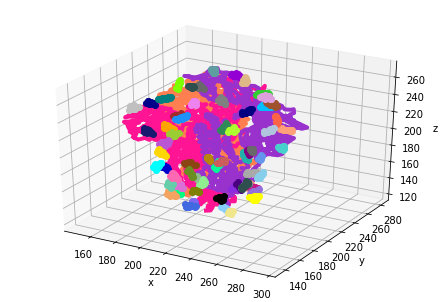

In [19]:
%matplotlib inline
showProtein(spike)